***Problem Statement***: One of the challenge for all Pharmaceutical companies is to understand the persistency of drug as per the physician prescription. To solve this problem ABC pharma company approached an analytics company to automate this process of identification.

***ML Problem***: With an objective to gather insights on the factors that are impacting the persistency, build a classification for the given dataset.

***Target Variable***: `persistency_flag`  

***Task***:

- Problem understanding   
- Data Understanding  
- Data Cleaning and Feature engineering  
- Model Development  
- Model Selection  
- Model Evaluation  
- Report the accuracy, precision and recall of both the class of target variable  
- Report ROC-AUC as well  
- Deploy the model  
- Explain the challenges and model selection  

## Feature Description

| Bucket                   | Variable                            | Variable Description                                                                                                                                                                                                                                                                         |
|--------------------------|-------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Unique Row Id            | Patient ID                          | Unique ID of each patient                                                                                                                                                                                                                                                                    |
| Target Variable          | Persistency_Flag                    | Flag indicating if a patient was persistent or not                                                                                                                                                                                                                                           |
| Demographics             | Age                                 | Age of the patient during their therapy                                                                                                                                                                                                                                                      |
|                          | Race                                | Race of the patient from the patient table                                                                                                                                                                                                                                                   |
|                          | Region                              | Region of the patient from the patient table                                                                                                                                                                                                                                                 |
|                          | Ethnicity                           | Ethnicity of the patient from the patient table                                                                                                                                                                                                                                              |
|                          | Gender                              | Gender of the patient from the patient table                                                                                                                                                                                                                                                 |
|                          | IDN Indicator                       | Flag indicating patients mapped to IDN                                                                                                                                                                                                                                                       |
| Provider Attributes      | NTM - Physician Specialty           | Specialty of the HCP that prescribed the NTM Rx                                                                                                                                                                                                                                              |
| Clinical Factors         | NTM - T-Score                       | T Score of the patient at the time of the NTM Rx (within 2 years prior from rxdate)                                                                                                                                                                                                          |
|                          | Change in T Score                   | Change in Tscore before starting with any therapy and after receiving therapy  (Worsened, Remained Same, Improved, Unknown)                                                                                                                                                                  |
|                          | NTM - Risk Segment                  | Risk Segment of the patient at the time of the NTM Rx (within 2 years days prior from rxdate)                                                                                                                                                                                                |
|                          | Change in Risk Segment              | Change in Risk Segment before starting with any therapy and after receiving therapy (Worsened, Remained Same, Improved, Unknown)                                                                                                                                                             |
|                          | NTM - Multiple Risk Factors         | Flag indicating if  patient falls under multiple risk category (having more than 1 risk) at the time of the NTM Rx (within 365 days prior from rxdate)                                                                                                                                       |
|                          | NTM - Dexa Scan Frequency           | Number of DEXA scans taken prior to the first NTM Rx date (within 365 days prior from rxdate)                                                                                                                                                                                                |
|                          | NTM - Dexa Scan Recency             | Flag indicating the presence of Dexa Scan before the NTM Rx (within 2 years prior from rxdate or between their first Rx and Switched Rx; whichever is smaller and applicable)                                                                                                                |
|                          | Dexa During Therapy                 | Flag indicating if the patient had a Dexa Scan during their first continuous therapy                                                                                                                                                                                                         |
|                          | NTM - Fragility Fracture Recency    | Flag indicating if the patient had a recent fragility fracture (within 365 days prior from rxdate)                                                                                                                                                                                           |
|                          | Fragility Fracture During Therapy   | Flag indicating if the patient had fragility fracture  during their first continuous therapy                                                                                                                                                                                                 |
|                          | NTM - Glucocorticoid Recency        | Flag indicating usage of Glucocorticoids (>=7.5mg strength) in the one year look-back from the first NTM Rx                                                                                                                                                                                  |
|                          | Glucocorticoid Usage During Therapy | Flag indicating if the patient had a Glucocorticoid usage during the first continuous therapy                                                                                                                                                                                                |
| Disease/Treatment Factor | NTM - Injectable Experience         | Flag indicating any injectable drug usage in the recent 12 months before the NTM OP Rx                                                                                                                                                                                                       |
|                          | NTM - Risk Factors                  | Risk Factors that the patient is falling into. For chronic Risk Factors complete lookback to be applied and for non-chronic Risk Factors, one year lookback from the date of first OP Rx                                                                                                     |
|                          | NTM - Comorbidity                   | Comorbidities are divided into two main categories - Acute and chronic, based on the ICD codes. For chronic disease we are taking complete look back from the first Rx date of NTM therapy and for acute diseases, time period  before the NTM OP Rx with one year lookback has been applied |
|                          | NTM - Concomitancy                  | Concomitant drugs recorded prior to starting with a therapy(within 365 days prior from first rxdate)                                                                                                                                                                                         |
|                          | Adherence                           | Adherence for the therapies                                                                                                                                                                                                                                                                  |

### Additional Research

- Nontuberculous mycobacterial (NTM)
- A DEXA scan is an imaging test that measures bone density (strength). DEXA scan results can provide helpful details about your risk for osteoporosis (bone loss) and fractures (bone breaks). This test can also measure your body composition, such as body fat and muscle mass. (https://my.clevelandclinic.org/health/diagnostics/10683-dexa-dxa-scan-bone-density-test)
- 

### Initial Hypthesis:
A (recent) history of medical intervention beyond the general practitioner/annual exams will be predictive of adherance.

## EDA

In [239]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy

In [240]:
# initial cleaning identified Ptid as the index 
df = pd.read_excel('Healthcare_dataset.xlsx', sheet_name='Dataset')
df.columns = df.columns.str.lower()

In [241]:
df.head()

,ptid,persistency_flag,gender,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,risk_segment_prior_ntm,tscore_bucket_prior_ntm,risk_segment_during_rx,tscore_bucket_during_rx,change_t_score,change_risk_segment,adherent_flag,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1


In [242]:
df.tail()

,ptid,persistency_flag,gender,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,risk_segment_prior_ntm,tscore_bucket_prior_ntm,risk_segment_during_rx,tscore_bucket_during_rx,change_t_score,change_risk_segment,adherent_flag,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,Y,Y,Y,N,Y,Y,N,N,N,Y,N,Y,Y,N,N,Y,Y,Y,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Non-Adherent,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,N,N,7,Y,N,N,VLR_LR,>-2.5,HR_VHR,<=-2.5,No change,Worsened,Adherent,Y,Y,Y,N,N,Y,Y,N,N,N,N,N,Y,N,N,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,Y,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,Y,Y,Y,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
3423,P3424,Non-Persistent,Female,Caucasian,Not Hispanic,South,65-75,Unknown,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,Y,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,1


There are 69 fields, far too many to break out here, but they are binned in the following categories:
- Unique Row Id  
- Target Variable
- Demographics  
- Provider Attributes  
- Clinical Factors  
- Disease/Treatment Factor

In [243]:
df.isna().sum().any() # false

False

In [244]:
# Find all the categorical variables
all(df.dtypes=='uint8')

False

## Missing Value Scrub

In [245]:
missing_data_identifiers = []

In [246]:
df.persistency_flag.value_counts()

Non-Persistent    2135
Persistent        1289
Name: persistency_flag, dtype: int64

In [247]:
df.gender.value_counts()

Female    3230
Male       194
Name: gender, dtype: int64

In [248]:
df.race.value_counts()

Caucasian           3148
Other/Unknown         97
African American      95
Asian                 84
Name: race, dtype: int64

In [249]:
missing_data_identifiers.append('Other/Unknown')
missing_data_identifiers.append('Others')	
missing_data_identifiers.append('OB/GYN/Others/PCP/Unknown')

In [250]:
df.ethnicity.value_counts()

Not Hispanic    3235
Hispanic          98
Unknown           91
Name: ethnicity, dtype: int64

In [251]:
missing_data_identifiers.append('Unknown')

In [252]:
df.region.value_counts()

Midwest          1383
South            1247
West              502
Northeast         232
Other/Unknown      60
Name: region, dtype: int64

In [253]:
df.age_bucket.value_counts()

>75      1439
65-75    1086
55-65     733
<55       166
Name: age_bucket, dtype: int64

In [254]:
df.ntm_specialist_flag.value_counts()

Others        2013
Specialist    1411
Name: ntm_specialist_flag, dtype: int64

Now let's check out the `clinical factors` which all appear to be binary 

In [255]:
df.iloc[:, 9:].isna().sum().sort_values().sum() #no missing values here

0

In [256]:
# Here are all the NaN indicators
missing_data_identifiers

['Other/Unknown', 'Others', 'OB/GYN/Others/PCP/Unknown', 'Unknown']

#### Prepare Clinical Factors variables

In [257]:
# # check the values to see where we have only 2 unique values for a column (dummy)
# bin_columns = []
# other_columns = []
# for column in df.columns:
#     uniq_vals = len(df[column].value_counts())
#     if uniq_vals == 2:
#         bin_columns.append(column)
#     elif 2 < uniq_vals <= 3:
#         other_columns.append(column)

# # print('Binary\n',  bin_columns)
# # print('Others\n',  other_columns)

Let's check the rest of the other columns to confirm there are no missing/unknown values

In [258]:
# for col in other_columns:
#     print(df[col].value_counts())

## Reimport the dataset with our new information

In [259]:
df = pd.read_excel('Healthcare_dataset.xlsx', sheet_name='Dataset', index_col='Ptid', na_values=missing_data_identifiers)
df.columns = df.columns.str.lower()
df.index.names = ['ptid']

In [260]:
df.head()

,persistency_flag,gender,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,risk_segment_prior_ntm,tscore_bucket_prior_ntm,risk_segment_during_rx,tscore_bucket_during_rx,change_t_score,change_risk_segment,adherent_flag,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks
ptid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,NaN,NaN,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,NaN,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,NaN,NaN,N,N,0,N,N,N,VLR_LR,>-2.5,NaN,NaN,NaN,NaN,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
P3,Non-Persistent,Female,NaN,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,NaN,NaN,N,N,0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2
P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,NaN,NaN,N,Y,0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,NaN,NaN,Y,Y,0,N,N,N,HR_VHR,<=-2.5,NaN,NaN,NaN,NaN,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1


## Missing Data

In [261]:
# lets find fields with less than 5% NaN counts 
filter = (df.isna().sum().sort_values(ascending=False)/df.shape[0])
filter[(filter > 0) & (filter <0.05)]

race         0.028329
ethnicity    0.026577
region       0.017523
dtype: float64

We will drop these rows

In [262]:
fields_w_nans_todrop = filter[(filter > 0) & (filter <0.05)].index.to_list()
fields_w_nans_todrop

['race', 'ethnicity', 'region']

In [263]:
df = df.dropna(subset=fields_w_nans_todrop)

In [264]:
# now lets look the rest of the fields with NaNs
filter = (df.isna().sum().sort_values(ascending=False)/df.shape[0])
nans = filter[(filter > 0.1)].index.tolist()
nans

['change_risk_segment',
 'ntm_speciality_bucket',
 'ntm_specialist_flag',
 'change_t_score',
 'risk_segment_during_rx',
 'tscore_bucket_during_rx']

Let's compare how the proportions of persistent and non-persistent patients with respect to each of these fields

In [265]:
for col in nans:
    print (col)
    temp_df = (df.groupby(["persistency_flag", col], dropna=False).size() / df.groupby(["persistency_flag"], dropna=False).size())
    #print (df.groupby(["persistency_flag", col], dropna=False).size() / df.groupby(["persistency_flag"], dropna=False).size())
    for j in ['Non-Persistent', 'Persistent']:
        print (f'\t {j}: \t{temp_df.loc[pd.IndexSlice[(j)]][-1]}')

change_risk_segment
	 Non-Persistent: 	0.6780341023069207
	 Persistent: 	0.6018211920529801
ntm_speciality_bucket
	 Non-Persistent: 	0.6715145436308927
	 Persistent: 	0.5248344370860927
ntm_specialist_flag
	 Non-Persistent: 	0.6434302908726178
	 Persistent: 	0.5024834437086093
change_t_score
	 Non-Persistent: 	0.5025075225677031
	 Persistent: 	0.32367549668874174
risk_segment_during_rx
	 Non-Persistent: 	0.5025075225677031
	 Persistent: 	0.32367549668874174
tscore_bucket_during_rx
	 Non-Persistent: 	0.5025075225677031
	 Persistent: 	0.32367549668874174


##### Similar Missing Values

In [266]:
df.change_t_score.isna().sum()

1393

- `change_t_score`
- `tscore_bucket_during_rx`
- `risk_segment_during_rx`  
all have the same number of missing.  Let's make sure all these rows (Patient IDs) match.

In [267]:
df[df.change_t_score.isna() & df.tscore_bucket_during_rx.isna() & df.risk_segment_during_rx.isna()].shape[0] == df.change_t_score.isna().sum()

True

In [268]:
# Find all value counts in the data set within 10% of the number of missing values

target = df.change_t_score.isna().sum()

matches = []

for col in df.columns:
    val_counts =  df[col].value_counts(dropna=False)
    #print (val_counts) 

    test = ( abs(val_counts - target) < (target*.1))

    if test.any():

        print (col)
        #print (test)

region
age_bucket
ntm_speciality
ntm_specialist_flag
risk_segment_prior_ntm
tscore_bucket_prior_ntm
risk_segment_during_rx
tscore_bucket_during_rx
change_t_score
comorb_encounter_for_screening_for_malignant_neoplasms
comorb_encounter_for_immunization
comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx
risk_vitamin_d_insufficiency


In [269]:
df.groupby(["persistency_flag", "region"], dropna=False).size()/ df.groupby(["persistency_flag"], dropna=False).size()

persistency_flag  region   
Non-Persistent    Midwest      0.453862
                  Northeast    0.061184
                  South        0.356068
                  West         0.128887
Persistent        Midwest      0.363411
                  Northeast    0.076159
                  South        0.387417
                  West         0.173013
dtype: float64

In [270]:
df.groupby(["ntm_speciality", "change_t_score"], dropna=False).size()

ntm_speciality                        change_t_score
CARDIOLOGY                            No change           8
                                      NaN                14
CLINICAL NURSE SPECIALIST             NaN                 1
EMERGENCY MEDICINE                    NaN                 1
ENDOCRINOLOGY                         Improved           21
                                      No change         238
                                      Worsened           27
                                      NaN               142
GASTROENTEROLOGY                      NaN                 1
GENERAL PRACTITIONER                  Improved           35
                                      No change         632
                                      Worsened           53
                                      NaN               718
GERIATRIC MEDICINE                    NaN                 2
HEMATOLOGY & ONCOLOGY                 No change           8
                                      NaN      

In [271]:
df.change_t_score.value_counts(dropna=False)

No change    1556
NaN          1393
Worsened      162
Improved       91
Name: change_t_score, dtype: int64

##### Remainder of Missing

That leaves three fields with missing values.  Let's compare them one at a time.

##### Impute Values

`change_risk_segment`  

Change in Risk Segment before starting with any therapy and after receiving therapy (Worsened, Remained Same, Improved, Unknown)

In [272]:
df.change_risk_segment.value_counts(dropna=False)

NaN          2079
No change     990
Worsened      113
Improved       20
Name: change_risk_segment, dtype: int64

In [273]:
df.groupby(["persistency_flag", "change_risk_segment"], dropna=False).size() / df.groupby(["persistency_flag"], dropna=False).size()

persistency_flag  change_risk_segment
Non-Persistent    Improved               0.004012
                  No change              0.295386
                  Worsened               0.022568
                  NaN                    0.678034
Persistent        Improved               0.009934
                  No change              0.331954
                  Worsened               0.056291
                  NaN                    0.601821
dtype: float64

There are too many missing values to consider imputation.   

***CONSIDER** t test to evaluate significant difference in mean

***ACTION*** Drop this column

Let's compare how these numbers stacks up to our target variable

In [274]:
df.groupby(["ntm_speciality_bucket", "ntm_specialist_flag"], dropna=False).size() 

ntm_speciality_bucket  ntm_specialist_flag
Endo/Onc/Uro           Specialist              673
Rheum                  Specialist              556
NaN                    Specialist               83
                       NaN                    1890
dtype: int64

`ntm_specialist_flag` encoded as 'Others' are not actually NaN. They are most likely associated with patients that were not prescribed treatment by a specialist.  

**Action** Fill NaN values with 0 (indicating no specialist)

In [275]:
df['ntm_specialist_flag'] = np.where(df['ntm_specialist_flag']=='Specialist', 1, 0)

In [276]:
df.ntm_specialist_flag.value_counts(dropna=False)

0    1890
1    1312
Name: ntm_specialist_flag, dtype: int64

Let's compare 

In [277]:
df.groupby(["persistency_flag", "change_risk_segment"], dropna=False).size()

persistency_flag  change_risk_segment
Non-Persistent    Improved                  8
                  No change               589
                  Worsened                 45
                  NaN                    1352
Persistent        Improved                 12
                  No change               401
                  Worsened                 68
                  NaN                     727
dtype: int64

`ntm_speciality_bucket`  
Specialty of the HCP that prescribed the NTM Rx 

In [278]:
df.ntm_speciality_bucket.value_counts(dropna=False)

NaN             1973
Endo/Onc/Uro     673
Rheum            556
Name: ntm_speciality_bucket, dtype: int64

In [279]:
df.groupby(["persistency_flag", "ntm_speciality_bucket"], dropna=False).size() / df.groupby(["persistency_flag"], dropna=False).size()

persistency_flag  ntm_speciality_bucket
Non-Persistent    Endo/Onc/Uro             0.155466
                  Rheum                    0.173019
                  NaN                      0.671515
Persistent        Endo/Onc/Uro             0.300497
                  Rheum                    0.174669
                  NaN                      0.524834
dtype: float64

Endocrinology, Oncology, and Urology specialists see twice the rate of persistency as others.  We will change this field to indicate whether the patient was assigned to one of these specialties or not.  

In [280]:
df['ntm_speciality_bucket'] = np.where(df['ntm_speciality_bucket']=='Endo/Onc/Uro', 1, 0)
df.rename(columns={"ntm_speciality_bucket": "Endo/Onc/Uro_specialtist"}, inplace=True)

In [281]:
df.shape

(3202, 68)

In [282]:
df.head()

,persistency_flag,gender,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,Endo/Onc/Uro_specialtist,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,risk_segment_prior_ntm,tscore_bucket_prior_ntm,risk_segment_during_rx,tscore_bucket_during_rx,change_t_score,change_risk_segment,adherent_flag,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks
ptid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,0,0,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,NaN,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,0,0,N,N,0,N,N,N,VLR_LR,>-2.5,NaN,NaN,NaN,NaN,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,0,0,N,Y,0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,0,0,Y,Y,0,N,N,N,HR_VHR,<=-2.5,NaN,NaN,NaN,NaN,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
P6,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,0,0,N,N,0,N,N,N,HR_VHR,<=-2.5,NaN,NaN,NaN,NaN,Adherent,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,Y,N,N,N,N,N,N,N,N,2


## Encoding

In [297]:
# count additional fields
total = 0

for col in df.columns:
    if df[col].dtype == 'int64': break
    unique_vals = df[col].value_counts().size
    print (f'{col}: {unique_vals}')
    total += unique_vals - 1
    #break
print (total)

persistency_flag: 2
gender: 2
race: 3
ethnicity: 2
region: 4
age_bucket: 4
ntm_speciality: 34
44


In [299]:
df['ntm_speciality'].value_counts()

GENERAL PRACTITIONER                    1438
RHEUMATOLOGY                             556
ENDOCRINOLOGY                            428
ONCOLOGY                                 217
OBSTETRICS AND GYNECOLOGY                 83
ORTHOPEDIC SURGERY                        29
UROLOGY                                   28
CARDIOLOGY                                22
PATHOLOGY                                 16
OTOLARYNGOLOGY                            14
HEMATOLOGY & ONCOLOGY                     13
PEDIATRICS                                12
PHYSICAL MEDICINE AND REHABILITATION      11
SURGERY AND SURGICAL SPECIALTIES           8
PULMONARY MEDICINE                         7
PSYCHIATRY AND NEUROLOGY                   4
ORTHOPEDICS                                3
VASCULAR SURGERY                           2
HOSPICE AND PALLIATIVE MEDICINE            2
GERIATRIC MEDICINE                         2
NEPHROLOGY                                 2
TRANSPLANT SURGERY                         2
PLASTIC SU

In [283]:
# hot encode categorical columns
#cat_df = pd.get_dummies(df[bin_columns], drop_first= True )
cat_df = pd.get_dummies(df, drop_first= True )

# # drop categorical columns from original df
# df = df.drop(bin_columns, axis=1)

# # concat remaining columns with encoded columns
# df = pd.concat((df, cat_df), axis = 1)

# Now clean up column names
cat_df.columns = cat_df.columns.str.lower()
cat_df.columns = [s[:-2] if s.endswith('_y') else s for s in cat_df.columns ]


cat_df=cat_df.rename(columns = {'persistency_flag_persistent':'persistency_flag'})
cat_df.head()

,ntm_specialist_flag,endo/onc/uro_specialtist,dexa_freq_during_rx,count_of_risks,persistency_flag,gender_male,race_asian,race_caucasian,ethnicity_not hispanic,region_northeast,region_south,region_west,age_bucket_65-75,age_bucket_<55,age_bucket_>75,ntm_speciality_clinical nurse specialist,ntm_speciality_emergency medicine,ntm_speciality_endocrinology,ntm_speciality_gastroenterology,ntm_speciality_general practitioner,ntm_speciality_geriatric medicine,ntm_speciality_hematology & oncology,ntm_speciality_hospice and palliative medicine,ntm_speciality_hospital medicine,ntm_speciality_nephrology,ntm_speciality_neurology,ntm_speciality_nuclear medicine,ntm_speciality_obstetrics and gynecology,ntm_speciality_occupational medicine,ntm_speciality_oncology,ntm_speciality_ophthalmology,ntm_speciality_orthopedic surgery,ntm_speciality_orthopedics,ntm_speciality_otolaryngology,ntm_speciality_pain medicine,ntm_speciality_pathology,ntm_speciality_pediatrics,ntm_speciality_physical medicine and rehabilitation,ntm_speciality_plastic surgery,ntm_speciality_podiatry,ntm_speciality_psychiatry and neurology,ntm_speciality_pulmonary medicine,ntm_speciality_radiology,ntm_speciality_rheumatology,ntm_speciality_surgery and surgical specialties,ntm_speciality_transplant surgery,ntm_speciality_urology,ntm_speciality_vascular surgery,gluco_record_prior_ntm,gluco_record_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,risk_segment_prior_ntm_vlr_lr,tscore_bucket_prior_ntm_>-2.5,risk_segment_during_rx_vlr_lr,tscore_bucket_during_rx_>-2.5,change_t_score_no change,change_t_score_worsened,change_risk_segment_no change,change_risk_segment_worsened,adherent_flag_non-adherent,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls
ptid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P1,0,0,0,0,1,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P2,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P4,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,

In [285]:
cat_df.shape

(3202, 107)

In [140]:
pd.set_option('display.max_columns', None)
pd.concat((df.head(), df.tail()), axis = 0)

,race,ethnicity,region,age_bucket,ntm_speciality,endo/onc/uro_specialtist,dexa_freq_during_rx,risk_segment_during_rx,tscore_bucket_during_rx,change_t_score,change_risk_segment,count_of_risks,ntm_specialist_flag,persistency_flag,gender_male,gluco_record_prior_ntm,gluco_record_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,risk_segment_prior_ntm_vlr_lr,tscore_bucket_prior_ntm_>-2.5,adherent_flag_non-adherent,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls
ptid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P1,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,0,0,VLR_LR,<=-2.5,No change,NaN,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P2,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,0,0,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P4,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,0,0,HR_VHR,<=-2.5,No change,No change,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
P5,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,0,0,NaN,NaN,NaN,NaN,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
P6,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,0,0,NaN,NaN,NaN,NaN,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
P3420,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,0,0,NaN,NaN,NaN,NaN,1,0,1,0,0,0,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,1,0,1,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
P3421,Caucasian,Not Hispanic,South,>75,NaN,0,0,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P3422,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,1,7,HR_VHR,<=-2.5,No change,Worsened,1,1,1,0,0,0,1,0,0,1,1,0,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
P3423,Caucasian,Not Hispanic,South,55-65,NaN,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [141]:
pd.set_option('display.max_rows', None)

In [294]:
df.dtypes.value_counts()

object    64
int64      4
dtype: int64

In [143]:
df.dtypes

race                                                                  object
ethnicity                                                             object
region                                                                object
age_bucket                                                            object
ntm_speciality                                                        object
endo/onc/uro_specialtist                                               int64
dexa_freq_during_rx                                                    int64
risk_segment_during_rx                                                object
tscore_bucket_during_rx                                               object
change_t_score                                                        object
change_risk_segment                                                   object
count_of_risks                                                         int64
ntm_specialist_flag                                                    int64

''

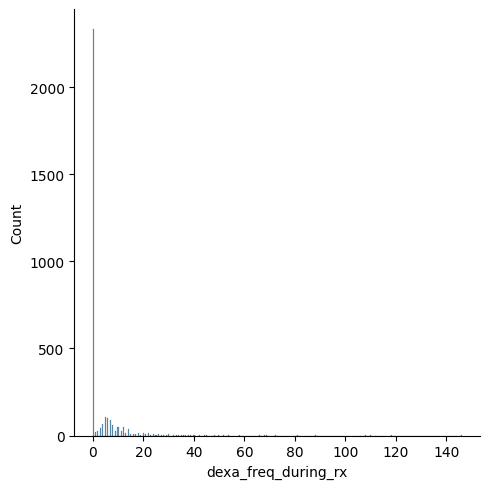

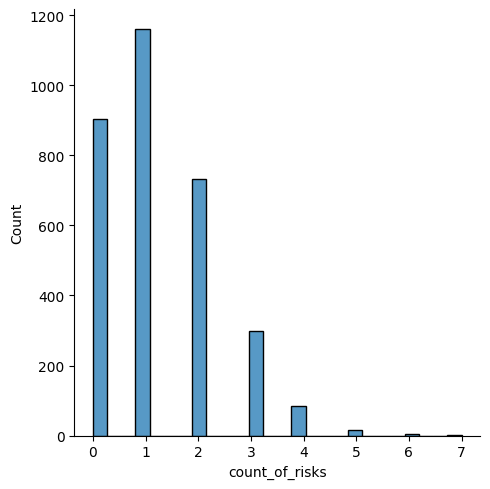

In [144]:
sns.displot(df["dexa_freq_during_rx"])
sns.displot(df["count_of_risks"])
;

In [145]:
df[['persistency_flag', 'gender_male', 'tscore_bucket_prior_ntm_>-2.5']].apply(pd.Series.value_counts)

,persistency_flag,gender_male,tscore_bucket_prior_ntm_>-2.5
0,1994,3020,1373
1,1208,182,1829


In [146]:
df.to_csv('data.csv')